In [3]:
# Notebook to solve Traveling Salesperson Problem
# Adapted from http://nbviewer.jupyter.org/url/norvig.com/ipython/TSP.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
import random
import time
import itertools
import urllib
import csv
import functools
from statistics import mean, stdev

In [136]:
def alltours_tsp(cities):
    return shortest_tour(alltours(cities))

def shortest_tour(tours):
    return min(tours, key=tour_length)

alltours = itertools.permutations 

In [137]:
def tour_length(tour):
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [138]:
from math import sqrt
class Point:
    def __init__(self, num, x, y):
        self.x = x
        self.y = y
        self.num = num
        
    def __str__(self):
        return "({}, {:.4f}, {:.4f})".format(self.num, self.x, self.y)
    
City = Point


def distance(A, B):
    return sqrt((A.x-B.x)**2 + (A.y-B.y)**2)

In [139]:
def Cities (n, width=900, height=600, seed=42):
    random.seed(seed*n)
    return [City(c, random.randrange(width), random.randrange(height)) for c in range(n)]


In [141]:
for c in Cities(6):
    print(c)


(0, 795.0000, 16.0000)
(1, 703.0000, 298.0000)
(2, 553.0000, 149.0000)
(3, 829.0000, 198.0000)
(4, 346.0000, 286.0000)
(5, 466.0000, 503.0000)


In [142]:
def plot_tour(tour):
    plot_lines(list(tour) + [tour[0]])

def plot_lines(cities, style='bo-'):
    plt.plot([c.x for c in cities], [c.y for c in cities], style)
    plt.axis('scaled'); 
      

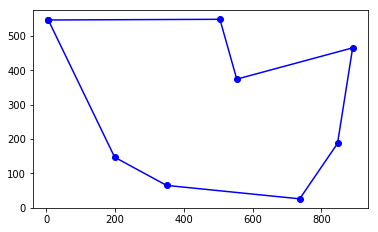

8 city tour with length 2509.3 in 0.311 secs for alltours_tsp


In [166]:
def plot_tsp(algo, cities):
    t0 = time.clock()
    tour = algo(cities)
    t1 = time.clock()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}".format(len(tour), tour_length(tour), t1 - t0, algo.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)

plot_tsp(alltours_tsp, Cities(8))

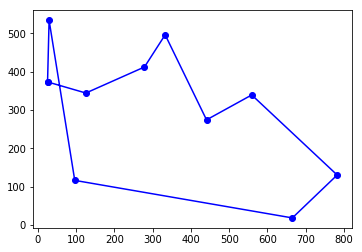

10 city tour with length 2381.4 in 0.000 secs for nn_tsp


In [167]:
def nn_tsp(cities):
    start = cities[0]
    tour = [start]
    untraveled = list(cities[1:])
    while len(untraveled) > 0:
        city = nearest(tour[-1], untraveled)
        tour.append(city)
        untraveled.remove(city)
    return tour

def nearest(A, cities):
    return min(cities, key=lambda c: distance(A,c))

# cities is a list
plot_tsp(nn_tsp, Cities(10))

In [165]:
def lines(textFile):
    my_file=open(textFile,"r")
    return my_file.readlines()   

def city_map(lines, delimiter=' '):
    return [City(int(row[0]), float(row[1]), float(row[2]))
        for row in csv.reader(lines, delimiter=delimiter, skipinitialspace=True)]

nn_cities = city_map(lines("nn.txt"))


In [154]:
tour = nn_tsp(nn_cities)
print("{} city tour with length {:.1f}".format(len(tour), tour_length(tour)))

33708 city tour with length 1203406.5
